In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('titanic_train.csv')
print(train.shape)

(891, 12)


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.sample(n=500)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q
508,509,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
636,637,0,3,"Leinonen, Mr. Antti Gustaf",male,32.0,0,0,STON/O 2. 3101292,7.9250,NaN,S
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S
...,...,...,...,...,...,...,...,...,...,...,...,...
80,81,0,3,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.0000,NaN,S
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C
335,336,0,3,"Denkoff, Mr. Mitto",male,NaN,0,0,349225,7.8958,NaN,S
158,159,0,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

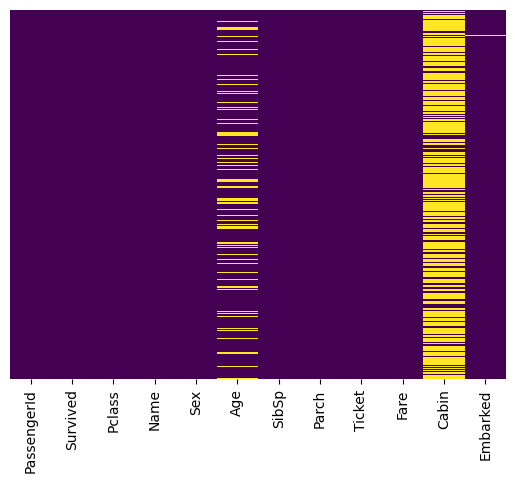

In [7]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [8]:
percent_missing = train.isnull().sum() * 100 / len(train)
percent_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

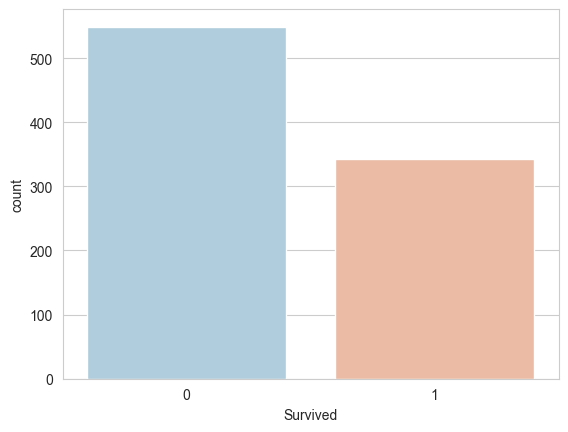

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

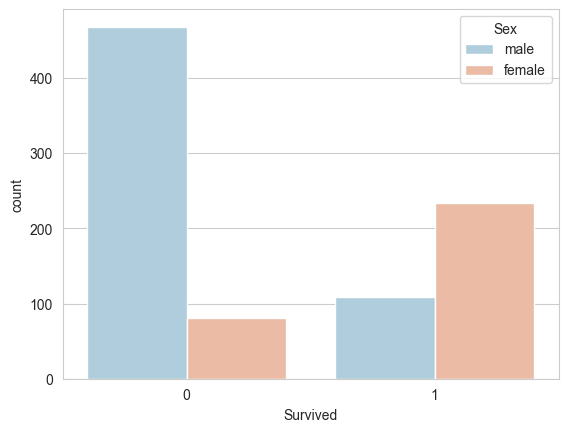

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex',data=train, palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

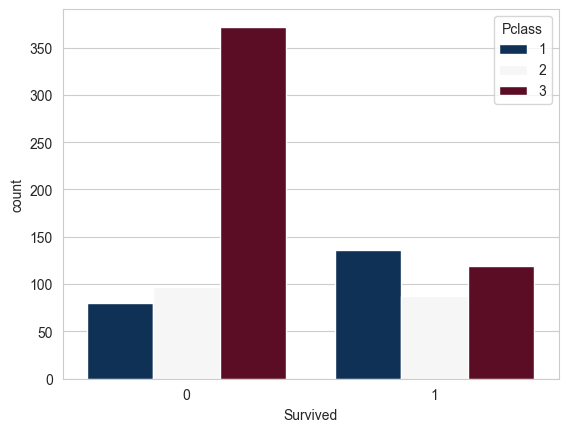

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass',data=train, palette='RdBu_r')

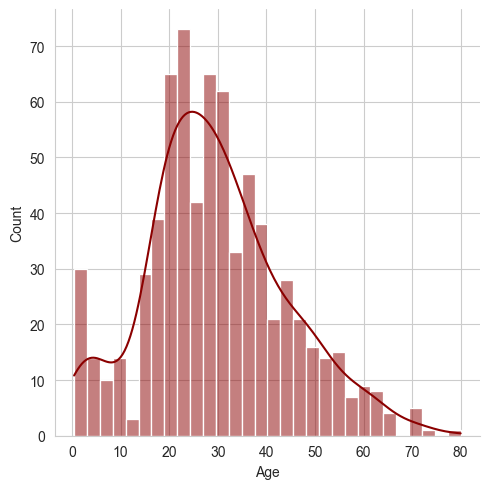

In [12]:
sns.displot(train['Age'].dropna(), kde=True, color='darkred', bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

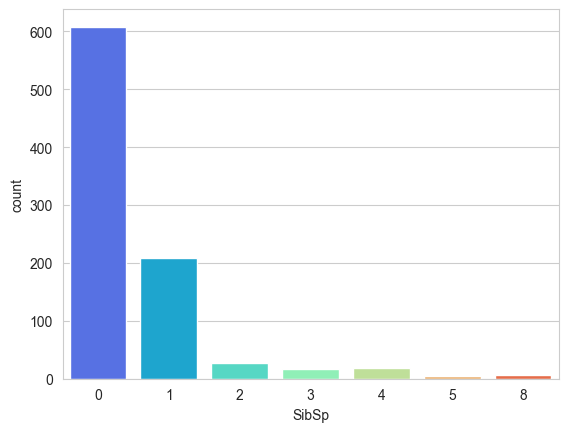

In [15]:
sns.countplot(x='SibSp', data=train, palette='rainbow')

<Axes: >

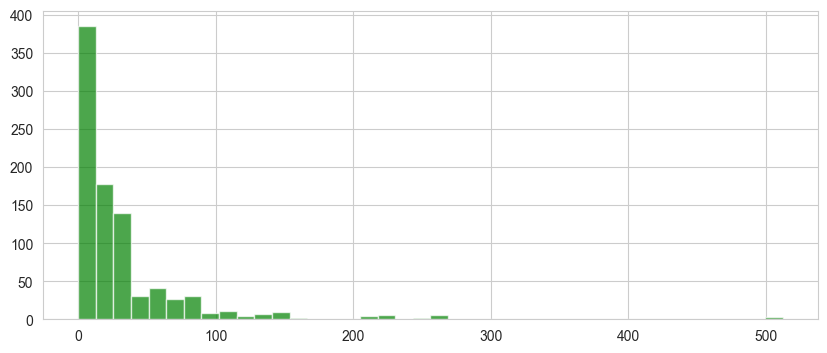

In [18]:
train['Fare'].hist(bins=40, color='green', alpha=0.7, figsize=(10, 4))

<Axes: xlabel='Pclass', ylabel='Age'>

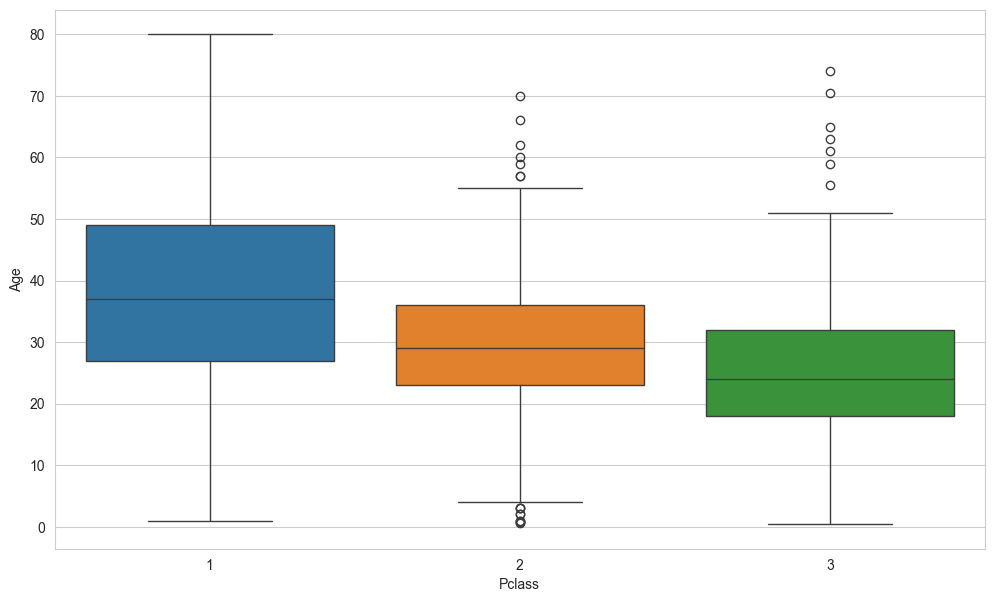

In [20]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='tab10')

In [23]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [25]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<Axes: >

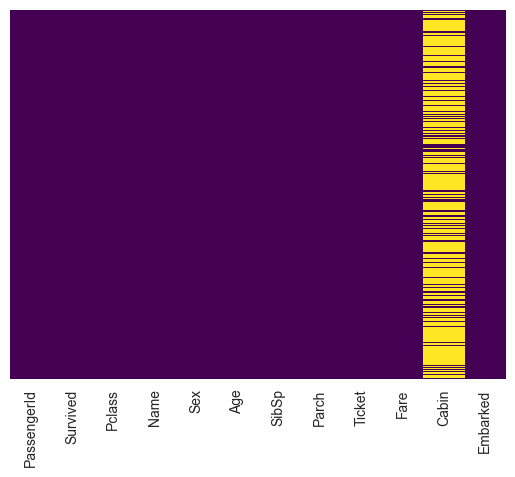

In [26]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [27]:
train.drop('Cabin', axis=1, inplace=True)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [29]:
train.dropna(inplace=True)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [31]:
train['Sex'].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

In [32]:
train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [34]:
sex=pd.get_dummies(train["Sex"],drop_first=True,dtype=int)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
embarked = pd.get_dummies(train["Embarked"], drop_first=True, dtype=int)

In [39]:
embarked.head(20)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [36]:
train.drop(['PassengerId','Sex','Embarked','Name','Ticket'], axis=1, inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [37]:
train=pd.concat([train,sex,embarked],axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [40]:
train.shape

(889, 9)

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.3, random_state=76)

In [42]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((622, 8), (267, 8), (622,), (267,))

In [43]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
predictions = logmodel.predict(x_test)

In [44]:
predictions[:5]

array([0, 0, 0, 0, 1])

In [45]:
predictions_prob = logmodel.predict_proba(x_test)
predictions_prob

array([[0.68815566, 0.31184434],
       [0.73182484, 0.26817516],
       [0.63948915, 0.36051085],
       [0.58347738, 0.41652262],
       [0.38132911, 0.61867089],
       [0.22045907, 0.77954093],
       [0.52244579, 0.47755421],
       [0.42370113, 0.57629887],
       [0.93297656, 0.06702344],
       [0.93771532, 0.06228468],
       [0.80233383, 0.19766617],
       [0.89155843, 0.10844157],
       [0.85115302, 0.14884698],
       [0.80635903, 0.19364097],
       [0.20592382, 0.79407618],
       [0.73947883, 0.26052117],
       [0.19379345, 0.80620655],
       [0.14117675, 0.85882325],
       [0.06236663, 0.93763337],
       [0.62906092, 0.37093908],
       [0.77443746, 0.22556254],
       [0.68210177, 0.31789823],
       [0.86147163, 0.13852837],
       [0.92552429, 0.07447571],
       [0.85427169, 0.14572831],
       [0.83421355, 0.16578645],
       [0.79563377, 0.20436623],
       [0.82508043, 0.17491957],
       [0.715953  , 0.284047  ],
       [0.85302995, 0.14697005],
       [0.

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
results = confusion_matrix(y_test, predictions)
results

array([[153,  28],
       [ 21,  65]])

In [47]:
accuracy_score(y_test, predictions)

0.8164794007490637

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       181
           1       0.70      0.76      0.73        86

    accuracy                           0.82       267
   macro avg       0.79      0.80      0.79       267
weighted avg       0.82      0.82      0.82       267

